In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Strongly correlated features
bedrooms = np.random.randint(1, 6, num_samples)
bathrooms = np.random.randint(1, 4, num_samples)
square_footage = np.random.randint(800, 4000, num_samples)

# Medium correlated features
lot_size = np.random.randint(1000, 10000, num_samples)
age = np.random.randint(0, 100, num_samples)

# Weakly correlated features
location = np.random.randint(1, 10, num_samples)
neighborhood_quality = np.random.randint(1, 10, num_samples)
condition = np.random.randint(1, 10, num_samples)
garage_size = np.random.randint(0, 3, num_samples)
energy_efficiency = np.random.randint(1, 10, num_samples)

# Generate the target variable (house price) with different weights
price = (
    50000 +  # Base price
    30000 * bedrooms +  # Strong correlation
    20000 * bathrooms +  # Strong correlation
    50 * square_footage +  # Strong correlation
    10 * lot_size +  # Medium correlation
    -200 * age +  # Medium correlation (older houses might be cheaper)
    5000 * location +  # Weak correlation
    3000 * neighborhood_quality +  # Weak correlation
    2000 * condition +  # Weak correlation
    10000 * garage_size +  # Weak correlation
    1000 * energy_efficiency +  # Weak correlation
    np.random.randn(num_samples) * 10000  # Noise
)

# Create a DataFrame
df_housing_biased = pd.DataFrame({
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'SquareFootage': square_footage,
    'LotSize': lot_size,
    'Age': age,
    'Location': location,
    'NeighborhoodQuality': neighborhood_quality,
    'Condition': condition,
    'GarageSize': garage_size,
    'EnergyEfficiency': energy_efficiency,
    'Price': price
})

# Calculate the correlation matrix with respect to the 'Price' column
correlation_matrix_price = df_housing_biased.corr()['Price'].sort_values(ascending=False)
print(correlation_matrix_price)

# Display the first few rows of the DataFrame
print(df_housing_biased.head())

Price                  1.000000
SquareFootage          0.643064
Bedrooms               0.612352
LotSize                0.368568
Bathrooms              0.215877
Location               0.158153
GarageSize             0.141015
NeighborhoodQuality    0.117488
Condition              0.055420
Age                   -0.038490
EnergyEfficiency      -0.048024
Name: Price, dtype: float64
   Bedrooms  Bathrooms  SquareFootage  LotSize  Age  Location  \
0         4          1           1102     3426   56         1   
1         5          1           3591     6546   71         8   
2         3          3           1387     7852    6         8   
3         5          2           1786     3551   77         2   
4         5          1           2663     7411   55         7   

   NeighborhoodQuality  Condition  GarageSize  EnergyEfficiency          Price  
0                    9          7           1                 6  327171.799110  
1                    4          7           2                 8  54

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define the features and target variable
features = ['SquareFootage', 'Bedrooms', 'LotSize', 'Bathrooms']
X = df_housing_biased[features]
y = df_housing_biased['Price']

# Perform scaling on the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 462709374.53684646
R^2 Score: 0.9104209204890158


In [44]:
# Create a DataFrame from X_scaled with the appropriate column names
df_X_scaled = pd.DataFrame(X_scaled, columns=features)


   SquareFootage  Bedrooms   LotSize  Bathrooms
0      -1.445831  0.695300 -0.785800  -1.210200
1       1.262312  1.393393  0.442652  -1.210200
2      -1.135738 -0.002792  0.956870   1.244566
3      -0.701608  1.393393 -0.736583   0.017183
4       0.252607  1.393393  0.783233  -1.210200


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming df_housing_biased is already defined as in the previous example
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_housing_biased[['SquareFootage', 'Bedrooms', 'LotSize', 'Bathrooms']])
y = df_housing_biased['Price'].values.reshape(-1, 1)

# Add a column of ones to X_scaled to account for the bias term
X_scaled = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Initialize parameters
theta = np.array([0.1, -2.5, 1.5, 0.3, 0.1]).reshape(-1, 1)  # 5 parameters: 4 for features + 1 for bias
alpha = 0.01
iterations = 300
m = len(y)

# Gradient Descent
costs = []
params = []

for iteration in range(iterations):
    predictions = X_scaled.dot(theta)
    errors = predictions - y
    cost = (1/(2*m)) * np.sum(errors**2)
    gradients = (1/m) * X_scaled.T.dot(errors)
    theta -= alpha * gradients
    
    # Store the cost and parameters
    costs.append(cost)
    params.append(theta.flatten())

# Create a DataFrame to store the results
results_df = pd.DataFrame(params, columns=[f'theta_{i}' for i in range(theta.shape[0])])
results_df['ValueOfCostFunction'] = results_df.apply(lambda row: (1/(2*m)) * np.sum((X_scaled.dot(row[:theta.shape[0]].values.reshape(-1, 1)) - y)**2), axis=1)
results_df['Cost'] = costs




In [67]:
results_df

,theta_0,theta_1,theta_2,theta_3,theta_4,ValueOfCostFunction,Cost
0,1.230050e+06,1.438259e+05,1.369498e+05,8.242916e+04,4.828101e+04,3.485554e+11,8.683571e+10
1,-1.230050e+06,-1.612004e+05,-1.714339e+05,-1.041870e+05,-4.235593e+04,1.403005e+12,3.485554e+11
2,3.690150e+06,4.865229e+05,5.223355e+05,3.201211e+05,1.240748e+05,5.658671e+12,1.403005e+12
3,-6.150249e+06,-8.905469e+05,-1.037721e+06,-6.476774e+05,-1.721910e+05,2.287160e+13,5.658671e+12
4,1.353055e+07,2.040390e+06,2.469966e+06,1.564785e+06,3.311886e+05,9.268322e+13,2.287160e+13
...,...,...,...,...,...,...,...
295,-4.383209e+94,-4.630698e+109,-2.726347e+110,-2.475897e+110,1.247567e+110,8.381915e+220,1.612742e+220
296,7.791917e+94,1.055688e+110,6.215417e+110,5.644453e+110,-2.844153e+110,4.356339e+221,8.381915e+220
297,-1.912152e+95,-2.406717e+110,-1.416966e+111,-1.286800e+111,6.483988e+110,2.264124e+222,4.356339e+221
298,4.239491e+95,5.486738e+110,3.230344e+111,2.933596e+111,-1.478194e+111,1.176735e+223,2.264124e+222


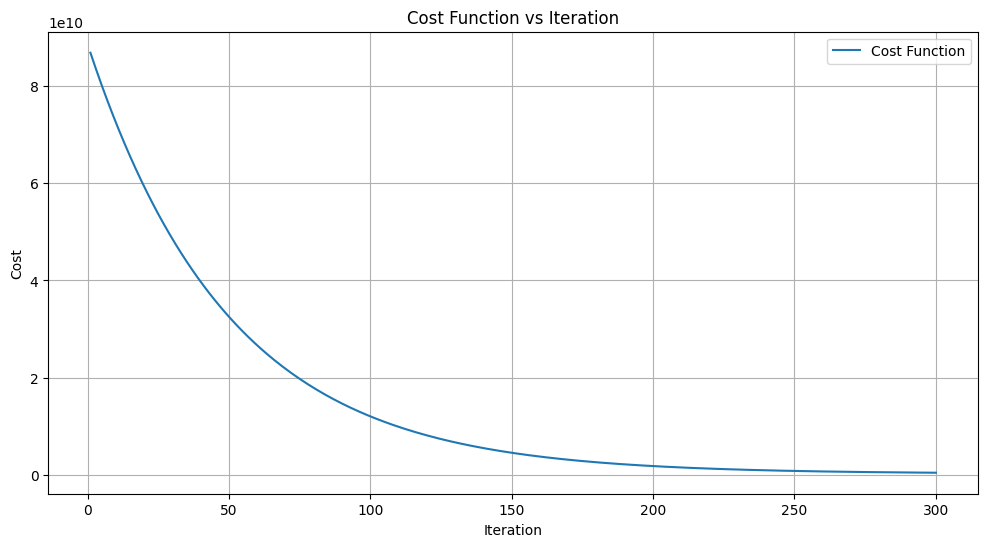

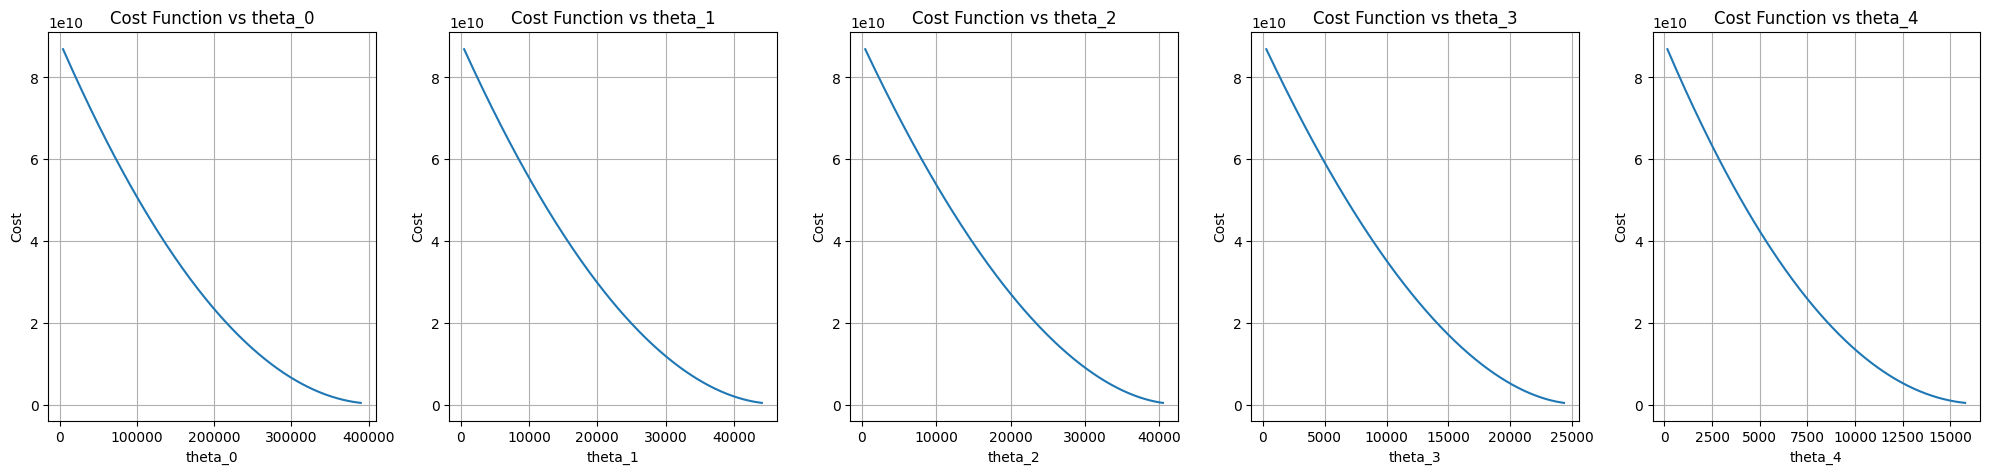

In [5]:
import matplotlib.pyplot as plt

# Plot cost function vs iteration
plt.figure(figsize=(12, 6))
plt.plot(range(1, iterations + 1), costs, label='Cost Function')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function vs Iteration')
plt.legend()
plt.grid(True)
plt.show()

# Plot cost function vs each theta
fig, axes = plt.subplots(nrows=1, ncols=theta.shape[0], figsize=(20, 5))
for i in range(theta.shape[0]):
    axes[i].plot(results_df[f'theta_{i}'], results_df['Cost'])
    axes[i].set_xlabel(f'theta_{i}')
    axes[i].set_ylabel('Cost')
    axes[i].set_title(f'Cost Function vs theta_{i}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [52]:
X_scaled.shape

(1000, 4)

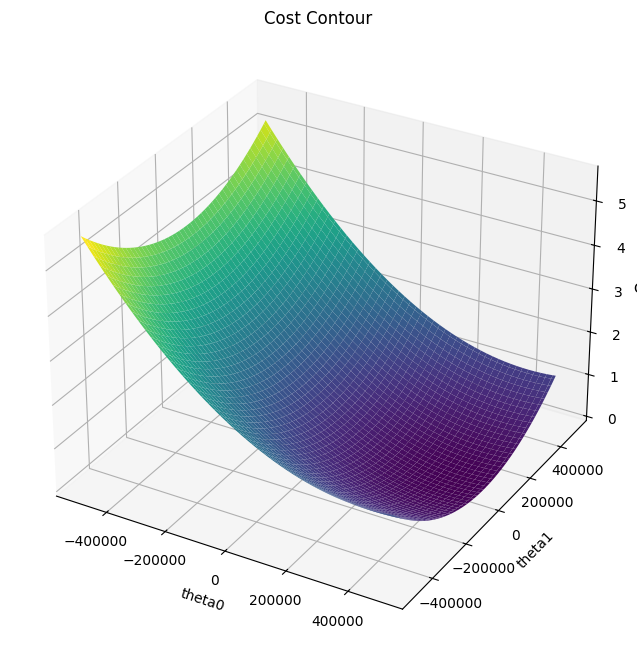

In [8]:
# create cost contour plot for this example
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid of theta0 and theta1 values
theta0_values = np.linspace(-500000, 500000, 100)
theta1_values = np.linspace(-500000, 500000, 100)
theta0_values, theta1_values = np.meshgrid(theta0_values, theta1_values)

# Calculate the cost for each theta combination
cost_values = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        predictions = X_scaled.dot(np.array([theta0_values[i, j], theta1_values[i, j], 0, 0, 0]).reshape(-1, 1))
        errors = predictions - y
        cost_values[i, j] = (1/(2*m)) * np.sum(errors**2)

# Plot the cost contour
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_values, theta1_values, cost_values, cmap='viridis')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Cost')
ax.set_title('Cost Contour')
plt.show()

# can you add two-dimensional contour plot to the above plot


In [10]:
# explain functionality of .ravel method()
# ravel() is a numpy method that returns a contiguous flattened array. It is equivalent to reshape(-1, order=order).
# The order parameter is optional and specifies the order of the elements in the flattened array.
# If order='C' (default), the elements are read in row-major order (C-style).
# If order='F', the elements are read in column-major order (Fortran-style).
# If order='A', the elements are read in Fortran-style if a is Fortran contiguous in memory, C-style otherwise.
# If order='K', the elements are read in the order the elements occur in memory.

# show and example of .ravel method()
import numpy as np

# Create a 2D array
arr = np.array([[1, 2, 3], [4, 5, 6],[1, 2, 3], [4, 5, 6],[1, 2, 3], [4, 5, 6]])

# Flatten the array using ravel
flattened = arr.ravel()

print('Original array:')
print(arr)
print('\nFlattened array:')
print(flattened)



Original array:
[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]

Flattened array:
[1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6]


   Degree  Train MSE  Test MSE  \
0       1   0.847679  0.653700   
1       2   0.814715  0.635841   
2       3   0.807502  0.642049   
3       4   0.787462  0.689128   
4       5   0.785879  0.685937   

                                        Coefficients            Intercept  
0                             [[2.7993236574802762]]  [4.142913319458566]  
1          [[1.617831292543039, 0.6053601115159483]]  [4.513066787886212]  
2  [[0.28428106223592287, 2.280167535977511, -0.5...  [4.731509717359745]  
3  [[4.592315163089816, -7.5343936717374715, 7.15...  [4.295636030377248]  
4  [[2.522200104828058, -0.26542232938598087, -2....  [4.440826349617338]  


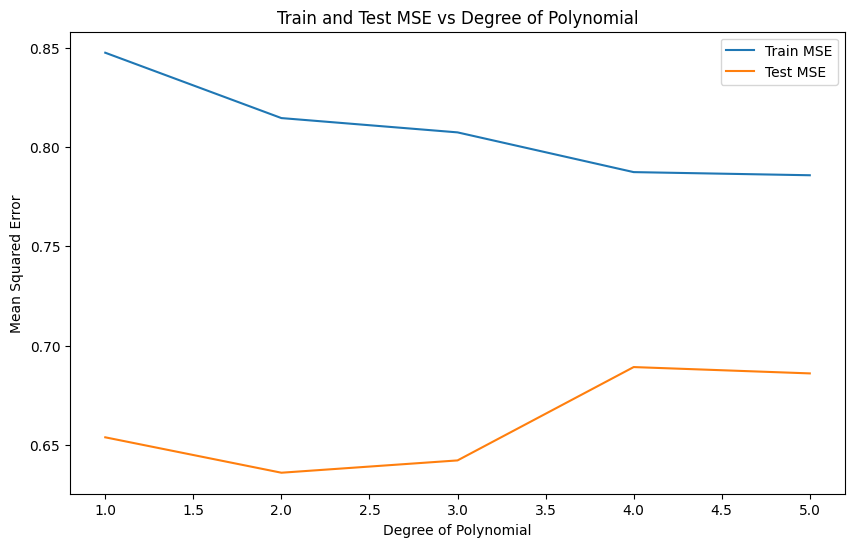

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to fit polynomial regression and compute cost
def polynomial_regression(degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)
    
    y_train_pred = lin_reg.predict(X_poly_train)
    y_test_pred = lin_reg.predict(X_poly_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    return train_mse, test_mse, lin_reg.coef_, lin_reg.intercept_

# Test different degrees of polynomial
degrees = [1, 2, 3, 4, 5]
results = []

for degree in degrees:
    train_mse, test_mse, coef, intercept = polynomial_regression(degree)
    results.append((degree, train_mse, test_mse, coef, intercept))

# Create a DataFrame to store the results
results_df = pd.DataFrame(results, columns=['Degree', 'Train MSE', 'Test MSE', 'Coefficients', 'Intercept'])

# Display the results
print(results_df)

# Plot Train and Test MSE vs Degree of Polynomial
plt.figure(figsize=(10, 6))
plt.plot(results_df['Degree'], results_df['Train MSE'], label='Train MSE')
plt.plot(results_df['Degree'], results_df['Test MSE'], label='Test MSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test MSE vs Degree of Polynomial')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to fit polynomial regression and compute cost
def polynomial_regression(degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)
    
    y_train_pred = lin_reg.predict(X_poly_train)
    y_test_pred = lin_reg.predict(X_poly_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    return train_mse, test_mse, lin_reg.coef_, lin_reg.intercept_

# Test different degrees of polynomial
degrees = [1, 2, 3, 4, 5]
results = []

for degree in degrees:
    train_mse, test_mse, coef, intercept = polynomial_regression(degree)
    results.append((degree, train_mse, test_mse, coef, intercept))

# Create a DataFrame to store the results
results_df = pd.DataFrame(results, columns=['Degree', 'Train MSE', 'Test MSE', 'Coefficients', 'Intercept'])

# Display the results
print(results_df)

# Plot Train and Test MSE vs Degree of Polynomial
plt.figure(figsize=(10, 6))
plt.plot(results_df['Degree'], results_df['Train MSE'], label='Train MSE')
plt.plot(results_df['Degree'], results_df['Test MSE'], label='Test MSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test MSE vs Degree of Polynomial')
plt.legend()
plt.show()